In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent
from cosmic.evolve import Evolve

In [109]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

In [110]:
plt.style.use('science')

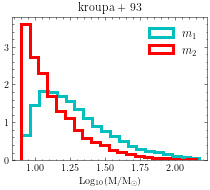

In [111]:
plt.hist(np.log10(InitialBinaries.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(InitialBinaries.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
plt.xlabel(r'Log$_{10}$(M/M$_{\odot}$)')
plt.legend(prop={'size' : 12})
plt.title("kroupa + 93")
plt.savefig("Plots/kroupa93/ini-mass-dist.pdf")
plt.show()

In [29]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [30]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1     mass_2      porb       ecc  \
199        1.0      1.0   39.205433  24.380749  1.474592  0.383463   
277        1.0      1.0   65.757794  49.707126  1.492296  0.897808   
449        1.0      1.0   70.032282  22.623659  1.546483  0.267278   
473        1.0      1.0   50.749694  14.278046  1.470575  0.054679   
528        1.0      1.0   53.121892  22.646013  1.432838  0.210795   
...        ...      ...         ...        ...       ...       ...   
9908       1.0      1.0  106.145152  13.958899  1.511686  0.124248   
9932       1.0      1.0   92.249546  88.010310  2.022390  0.758682   
10049      1.0      1.0   67.801625  46.257624  1.488577  0.270050   
10075      1.0      1.0   92.190627  91.253892  1.503422  0.061332   
10104      1.0      1.0   50.145475  41.470485  1.579670 

In [31]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [35]:
bh_ini_m1 = []
bh_ini_m2 = []

for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
for indx in bh_index_2:
    bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

In [40]:
x = np.log10(bh_ini_m1)
y = np.log10(bh_final_m1)

In [41]:
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10

xmin = min(x) - deltaX
xmax = max(x) + deltaX

ymin = min(y) - deltaY
ymax = max(y) + deltaY

In [42]:
print(xmin, xmax, ymin, ymax)

0.9601052565635976 2.286080145620928 0.3035463428070153 1.5615813828940106


In [43]:
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [44]:
import scipy.stats as st

In [45]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

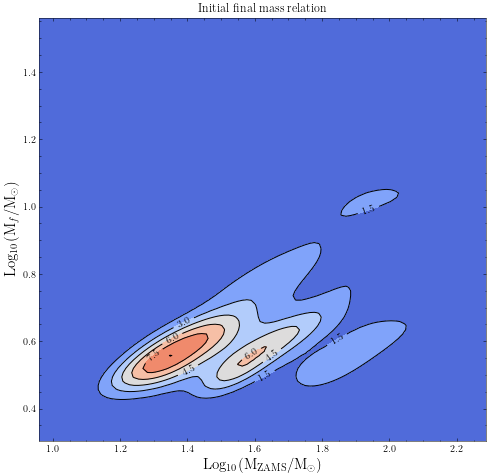

In [50]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=15)
ax.set_ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.title('Initial final mass relation')
plt.savefig("Plots/kroupa93/Mi-Mf-contour.pdf")
#ax.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.3,color="1",label="m1")

(0.6, 1.5091632562237192)

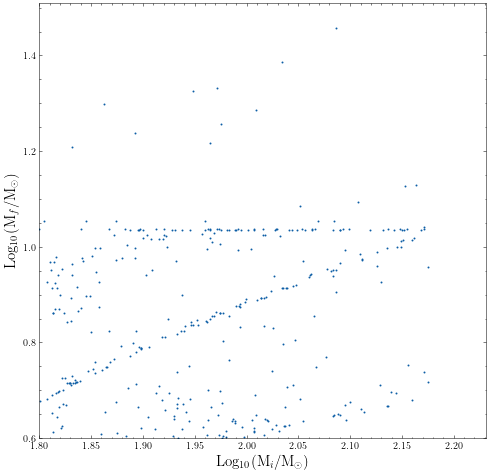

In [97]:
fig = plt.figure(figsize=(8,8))
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.xlim(1.8,)
plt.ylim(0.6,)

In [80]:
mia = 1.49; mib = 1.8; mic = 2.16;
mfa = 0.48; mfb = 0.7; mfc = 1.03;

m_bh = pd.DataFrame({'m1_ini': bh_ini_m1, 'm1_final': bh_final_m1,'m2_ini': bh_ini_m1, 'm2_final': bh_final_m1})

M1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mia]
M1_bh_sort2 = M1_bh_sort1[np.log10(M1_bh_sort1["m1_ini"])<mib]
M1_bh_sort3 = M1_bh_sort2[np.log10(M1_bh_sort2["m1_final"])>mfa]
M1_bh_sort4 = M1_bh_sort3[np.log10(M1_bh_sort3["m1_final"])<mfb]

Mb_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mib]
Mb_bh_sort2 = Mb_bh_sort1[np.log10(Mb_bh_sort1["m1_ini"])<mic]
Mb_bh_sort3 = Mb_bh_sort2[np.log10(Mb_bh_sort2["m1_final"])>mfb]
Mb_bh_sort4 = Mb_bh_sort3[np.log10(Mb_bh_sort3["m1_final"])<mfc]

In [81]:
def get_alpha(mi1,mi2,mf1,mf2):
    
    m1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mi1]
    m1_bh_sort2 = m1_bh_sort1[np.log10(m1_bh_sort1["m1_ini"])<mi2]
    m1_bh_sort3 = m1_bh_sort2[np.log10(m1_bh_sort2["m1_final"])>mf1]
    m1_bh_sort4 = m1_bh_sort3[np.log10(m1_bh_sort3["m1_final"])<mf2]
    
    m,b = np.polyfit(np.log10(m1_bh_sort4["m1_ini"]),np.log10(m1_bh_sort4["m1_final"]),1)
    print(m,b)
    
    return m,b

In [88]:
alpha1,b1 = get_alpha(1.49,1.6,0.48,0.56)

0.6325175288496242 -0.46053387201334195


In [99]:
alpha2,b2 = get_alpha(1.80,1.9,0.67,0.8)

0.9359100353276278 -1.0000878149214942


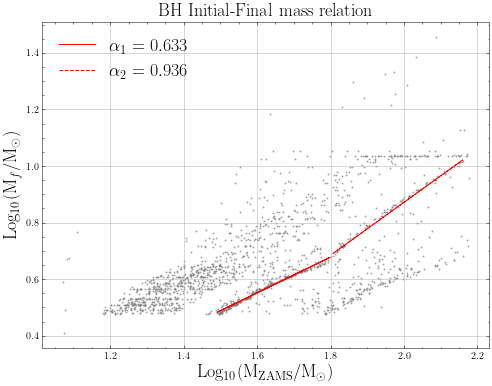

In [101]:
plt.figure(figsize=[8,6])
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,color="gray",alpha=0.6)
plt.plot(np.log10(M1_bh_sort4["m1_ini"]),alpha1*np.log10(M1_bh_sort4["m1_ini"])+b1,"r",label=r"$\alpha_{1} = %3.3f$"%(alpha1))
plt.plot(np.log10(Mb_bh_sort4["m1_ini"]),alpha2*np.log10(Mb_bh_sort4["m1_ini"])+b2,"r--",label=r"$\alpha_{2} = %3.3f$"%(alpha2))
plt.grid()
plt.xlabel(r'Log$_{10}$(M$_{\text{ZAMS}}$/M$_{\odot}$)', size=18)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=18)
plt.title("BH Initial-Final mass relation",size=18)
plt.legend(prop={'size' : 18})
plt.savefig("Plots/kroupa93/Mi-Mf-loglog.pdf")

In [3]:
ZMsun = 0.012

Zarray = np.array([1,1/2,1/10])

1.0


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
13        1.0      1.0   62.856637   44.355332  1.569418  0.541975   
1335      1.0      1.0   67.616139   23.149001  1.501896  0.520983   
1655      1.0      1.0  145.202783   68.050616  1.956937  0.478492   
1824      1.0      1.0   65.037669   53.397523  1.456001  0.269108   
2096      1.0      1.0  129.814272   57.004168  2.128704  0.303588   
2141      1.0      1.0   51.045087   36.325631  1.477723  0.149942   
2154      1.0      1.0   65.949983   40.104220  1.465196  0.366672   
2336      1.0      1.0  108.643887   60.505543  1.459688  0.057683   
2703      1.0      1.0   69.346206   37.110895  1.438627  0.101105   
2835      1.0      1.0   79.568735   44.571409  1.420008  0.520055   
2847      1.0      1.0   62.965372   56.954433  1.472673 

0.5


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
114       1.0      1.0  116.242824  109.410181  1.771318  0.886434   
1742      1.0      1.0   93.586850   75.040839  1.427750  0.011576   
1911      1.0      1.0  101.202297   68.391962  1.440290  0.314585   
2145      1.0      1.0   88.409025   78.267357  1.589370  0.656044   
2271      1.0      1.0  125.712576  120.672766  1.708423  0.176770   
3976      1.0      1.0  131.668104   22.693311  1.471818  0.115892   
5048      1.0      1.0   84.048694   43.970725  1.483866  0.221628   
5597      1.0      1.0   93.498089   60.090421  1.567811  0.041371   
6203      1.0      1.0  126.011477  111.233100  1.826518  0.004130   
6372      1.0      1.0  114.569876   45.269891  1.430564  0.515389   
6642      1.0      1.0  126.766688   76.619877  1.731023 

0.1


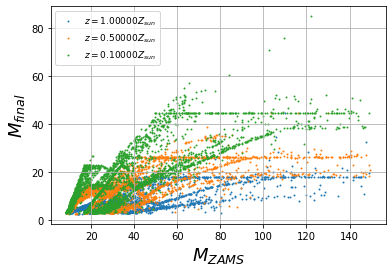

In [68]:
for z in Zarray:
    print(z)
    
    InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=z*ZMsun, size=10000)
    bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)
    
    bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
    bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)
    
    bh_ini_m1 = []
    #bh_ini_m2 = []

    for indx in bh_index_1:
        bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
    #for indx in bh_index_2:
        #bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])
    
    #bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
    #bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)
    plt.scatter(bh_ini_m1,bh_final_m1,s=0.9,label="$z = %3.5f Z_{sun}$"%(z))
    
plt.legend()
plt.xlabel("$M_{ZAMS}$",size=18)
plt.ylabel("$M_{final}$",size=18) 
plt.legend(prop={'size' : 9})
plt.grid()
plt.savefig("Plots/MivsMf_varying_Metallicity.pdf")

1.0


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
279        1.0      1.0   94.657529   29.421271  1.659160  0.517621   
539        1.0      1.0   84.703878   34.420005  1.632226  0.842078   
732        1.0      1.0   98.515236   43.624083  1.807904  0.360848   
892        1.0      1.0   63.502581   34.323844  1.417647  0.023890   
1069       1.0      1.0   89.408719   59.641695  1.436471  0.023340   
1923       1.0      1.0   61.231103   55.296442  1.514746  0.039881   
2307       1.0      1.0   55.664916   54.394104  1.588830  0.876348   
2316       1.0      1.0  139.648461  119.084768  2.294929  0.013243   
2391       1.0      1.0  113.224224   39.459785  1.514548  0.474703   
2732       1.0      1.0  111.001201   65.871030  1.463237  0.158839   
3070       1.0      1.0   82.298475   46.38696

0.5


/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
      kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
1398      1.0      1.0   91.152381   64.930961  1.491337  0.188952   
1861      1.0      1.0   88.776521   60.895469  1.420323  0.879460   
1932      1.0      1.0   90.773300   43.326127  1.427029  0.135899   
2229      1.0      1.0   90.699365   34.399766  1.459840  0.023026   
2400      1.0      1.0  109.107671   36.494800  1.537860  0.822961   
3119      1.0      1.0  120.383367  113.406553  1.649368  0.828255   
3470      1.0      1.0  137.940154  129.042606  1.735282  0.810608   
3518      1.0      1.0  129.500794   85.794065  1.429032  0.498593   
3614      1.0      1.0   67.041470   47.197065  1.434479  0.481403   
4003      1.0      1.0  124.202918   84.561980  1.569728  0.436688   
6371      1.0      1.0  131.634166  112.147173  1.587960 

0.1


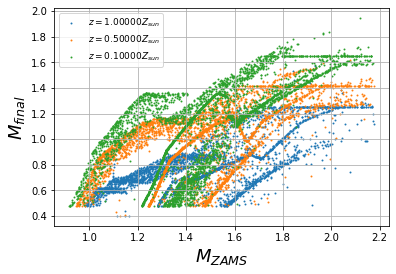

In [8]:
for z in Zarray:
    print(z)
    
    InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=z*ZMsun, size=10000)
    bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)
    
    bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
    bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)
    
    bh_ini_m1 = []
    #bh_ini_m2 = []

    for indx in bh_index_1:
        bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
    #for indx in bh_index_2:
        #bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])
    
    #bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
    #bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)
    plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="$z = %3.5f Z_{sun}$"%(z))
    
plt.legend()
plt.xlabel("$M_{ZAMS}$",size=18)
plt.ylabel("$M_{final}$",size=18) 
plt.legend(prop={'size' : 9})
plt.grid()
plt.savefig("Plots/MivsMf_varying_Metallicity-log.pdf")